In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
"""pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)"""
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


# Dataset and Details

In [ ]:
true_news = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false_news = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
false_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news['category'] = 1
false_news['category'] = 0

In [ ]:
all_news = pd.concat([true_news, false_news])
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     21417 non-null  object
 1   text      21417 non-null  object
 2   subject   21417 non-null  object
 3   date      21417 non-null  object
 4   category  21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
true_news.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
false_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     23481 non-null  object
 1   text      23481 non-null  object
 2   subject   23481 non-null  object
 3   date      23481 non-null  object
 4   category  23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [ ]:
false_news.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

Right now this class imbalance is not considered high skewed. After getting the results if I get not accurate results, I will consider some approaches for imbalance.

In [ ]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
all_news.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
all_news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
print(all_news.duplicated().sum())
all_news.drop_duplicates(inplace = True)

209


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)
chart = sns.countplot(x="subject", hue="category", data=all_news, palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
chart.legend(title="Category", loc="upper right")

plt.title("Distribution of Subjects by Category")
plt.xlabel("Subject")
plt.ylabel("Count")

sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
all_news['text'] = all_news['title']+ "---" +  all_news['text'] 
del all_news['title']
del all_news['subject']
del all_news['date']

In [ ]:
all_news.head()

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


#Preprocess

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)



Cleaning


In [ ]:
import re
from bs4 import BeautifulSoup
import requests  # Import the requests library
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


def strip_html(text):
    if text.startswith('http://') or text.startswith('https://'):
        response = requests.get(text)
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup.get_text()
    else:
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_stopwords(text):
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text



all_news['text'] = all_news['text'].apply(denoise_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipykernel_34/794439218.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [ ]:
all_news.head()

,text,category
0,"U.S. budget fight looms, Republicans flip fisc...",1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much more' ...,1


Wordcloud

True class

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt

texts = all_news[all_news.category == 1].text

# Create the WordCloud object with custom settings
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    stopwords=STOPWORDS,  # Use STOPWORDS
    background_color='white',
    colormap='viridis',
    random_state=42
).generate(" ".join(texts))

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Display the WordCloud on the axis
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

ax.set_title("Word Cloud - Texts Belonging to Category 1", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()


'\n# Filter the DataFrame to select only the texts belonging to the category "1"\ntexts = all_news[all_news.category == 1].text\n\n# Create the WordCloud object with custom settings\nwc = WordCloud(\n    max_words=2000,\n    width=1600,\n    height=800,\n    stopwords=STOPWORDS,  # Use STOPWORDS\n    background_color=\'white\',\n    colormap=\'viridis\',\n    random_state=42\n).generate(" ".join(texts))\n\n# Create a figure and axis objects\nfig, ax = plt.subplots(figsize=(12, 8))\n\n# Display the WordCloud on the axis\nax.imshow(wc, interpolation=\'bilinear\')\nax.set_axis_off()\n\n# Add a title to the plot\nax.set_title("Word Cloud - Texts Belonging to Category 1", fontsize=18, fontweight=\'bold\')\n\n# Adjust the layout to prevent clipping of the title\nplt.tight_layout()\n\n# Show the plot\nplt.show()'

Fake class

In [ ]:

texts = all_news[all_news.category == 0].text

wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    stopwords=STOPWORDS,  
    background_color='white',
    colormap='viridis',
    random_state=42
).generate(" ".join(texts))

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Display the WordCloud on the axis
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

ax.set_title("Word Cloud - Texts Belonging to Category 0", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()

'\n# Filter the DataFrame to select only the texts belonging to the category "1"\ntexts = all_news[all_news.category == 0].text\n\n# Create the WordCloud object with custom settings\nwc = WordCloud(\n    max_words=2000,\n    width=1600,\n    height=800,\n    stopwords=STOPWORDS,  # Use STOPWORDS\n    background_color=\'white\',\n    colormap=\'viridis\',\n    random_state=42\n).generate(" ".join(texts))\n\n# Create a figure and axis objects\nfig, ax = plt.subplots(figsize=(12, 8))\n\n# Display the WordCloud on the axis\nax.imshow(wc, interpolation=\'bilinear\')\nax.set_axis_off()\n\n# Add a title to the plot\nax.set_title("Word Cloud - Texts Belonging to Category 0", fontsize=18, fontweight=\'bold\')\n\n# Adjust the layout to prevent clipping of the title\nplt.tight_layout()\n\n# Show the plot\nplt.show()'

distribution of average word lengths in two categories of text: "Original text" and "Fake text"

/tmp/ipykernel_34/2899360862.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_original, ax=ax1, color='red')
/tmp/ipykernel_34/2899360862.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_fake, ax=ax2, color='green')


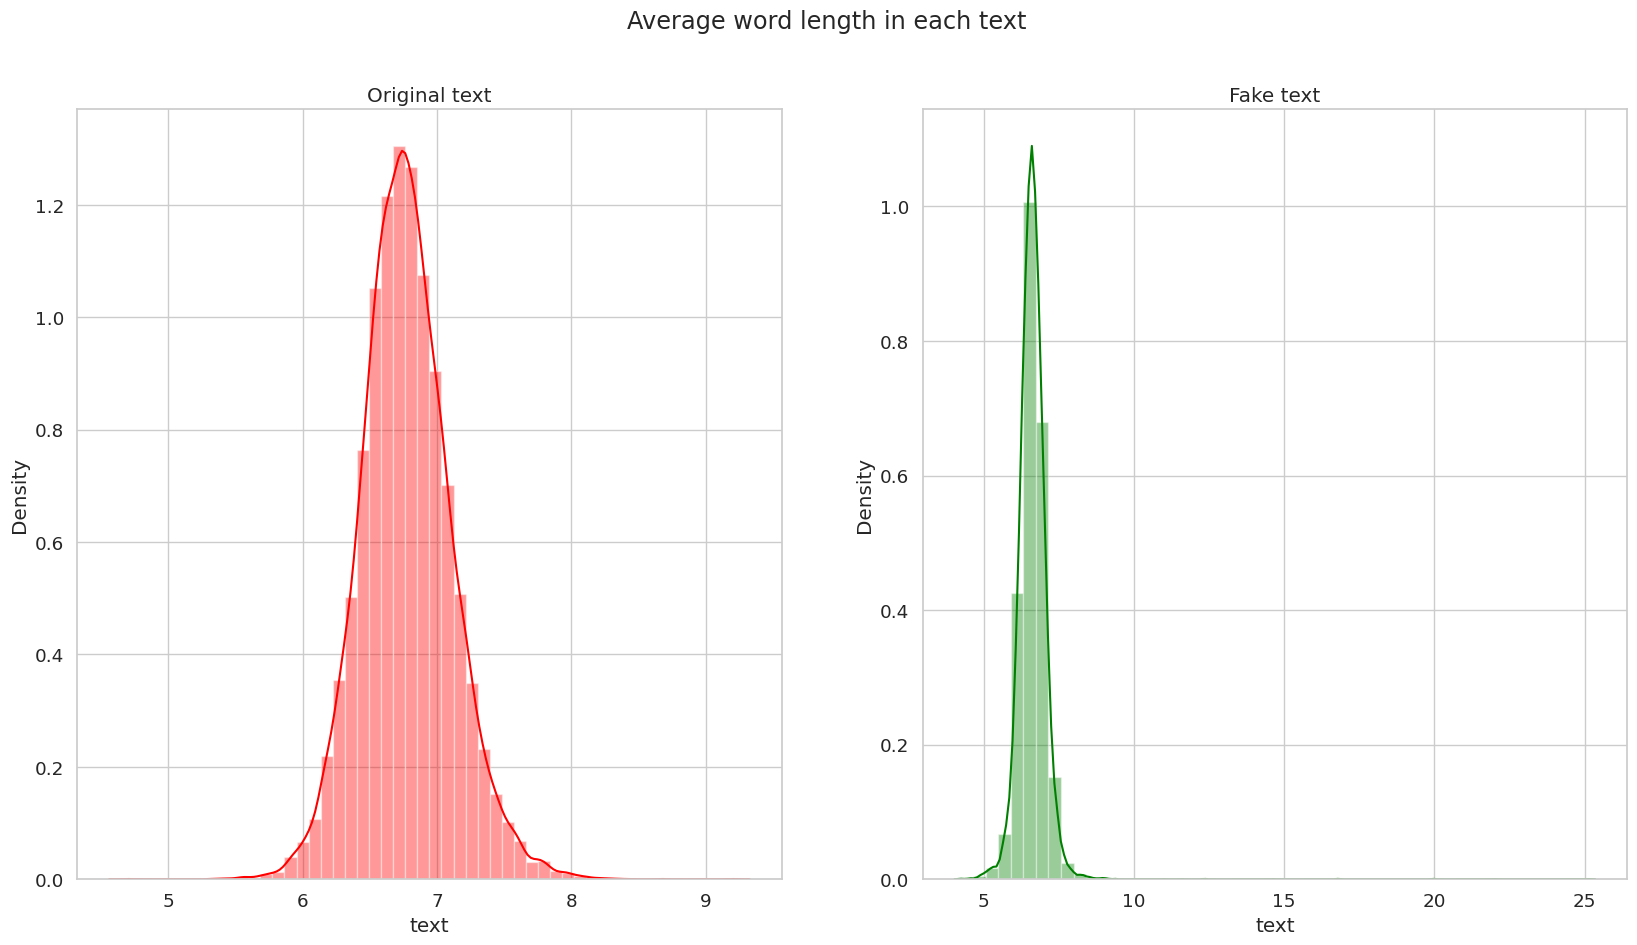

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Extract word lengths for "Original text" category
word_original = all_news[all_news['category'] == 1]['text'].str.split().apply(lambda x: np.mean([len(i) for i in x]))

sns.distplot(word_original, ax=ax1, color='red')
ax1.set_title('Original text')

# Extract word lengths for "Fake text" category
word_fake = all_news[all_news['category'] == 0]['text'].str.split().apply(lambda x: np.mean([len(i) for i in x]))

sns.distplot(word_fake, ax=ax2, color='green')
ax2.set_title('Fake text')

fig.suptitle('Average word length in each text')

plt.show()


In [ ]:
# Compute the maximum and minimum word lengths for each category
max_len_original = np.max(word_original)
min_len_original = np.min(word_original)

max_len_fake = np.max(word_fake)
min_len_fake = np.min(word_fake)

print("Original text - Maximum word length:", max_len_original)
print("Original text - Minimum word length:", min_len_original)

print("Fake text - Maximum word length:", max_len_fake)
print("Fake text - Minimum word length:", min_len_fake)


Original text - Maximum word length: 9.192307692307692
Original text - Minimum word length: 4.696153846153846
Fake text - Maximum word length: 25.153846153846153
Fake text - Minimum word length: 4.22737819025522


# Creating Corpus

In [ ]:
from collections import Counter

corpus = all_news['text'].str.split().explode().tolist()
import re

pattern = r"[-]"

# Remove the hyphens from the corpus using regular expressions and filter out empty strings
corpus = [re.sub(pattern, "", word) for word in corpus if word.strip()]


word_counts = Counter(corpus)

print("First 10 words:")
print(corpus[:10])

most_common_words = word_counts.most_common(10)
print("\n10 most frequent words with their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Display the 10 least frequent words with their frequencies
least_common_words = word_counts.most_common()[-10:]
print("\n10 least frequent words with their frequencies:")
for word, frequency in least_common_words:
    print(f"{word}: {frequency}")

First 10 words:
['U.S.', 'budget', 'fight', 'looms,', 'Republicans', 'flip', 'fiscal', 'scriptWASHINGTON', '(Reuters)', 'head']

10 most frequent words with their frequencies:
Trump: 110279
said: 92292
would: 54252
U.S.: 49883
people: 32958
President: 32746
also: 30125
one: 29248
Donald: 26613
said.: 25930

10 least frequent words with their frequencies:
grandmother.Last: 1
KEEP:: 1
Emanuel.Currently: 1
(regardless,: 1
scary).: 1
DUAL: 1
LOYALTIES:: 1
Mondoweiss,: 1
IDF.: 1
overdrive.READ: 1


# Bigrams, Trigrams, Fourgrams

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def get_top_text_ngrams(corpus, n, g):
    all_ngrams = []
    for text in corpus:
        words = text.split()
        for i in range(len(words) - g + 1):
            ngram = " ".join(words[i:i+g])
            all_ngrams.append(ngram)
    
    ngram_counts = Counter(all_ngrams)
    top_ngrams = ngram_counts.most_common(n)
    
    return top_ngrams

plt.figure(figsize=(16, 9))

# Top 10 Bigrams
most_common_bi = get_top_text_ngrams(all_news.text, 10, 2)
most_common_bi = dict(most_common_bi)

labels = list(most_common_bi.keys())
values = list(most_common_bi.values())

plt.subplot(1, 3, 1)
plt.barh(range(len(labels)), values)
plt.yticks(range(len(labels)), labels)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 10 Bigrams')

# Top 10 Trigrams
most_common_tri = get_top_text_ngrams(all_news.text, 10, 3)
most_common_tri = dict(most_common_tri)

labels_tri = list(most_common_tri.keys())
values_tri = list(most_common_tri.values())

plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 2)
plt.barh(range(len(labels_tri)), values_tri)
plt.yticks(range(len(labels_tri)), labels_tri)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Trigrams')

# Top 10 Fourgrams
most_common_four = get_top_text_ngrams(all_news.text, 10, 4)
most_common_four = dict(most_common_four)

labels_four = list(most_common_four.keys())
values_four = list(most_common_four.values())

plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 3)
plt.barh(range(len(labels_four)), values_four)
plt.yticks(range(len(labels_four)), labels_four)
plt.xlabel('Frequency')
plt.ylabel('Fourgram')
plt.title('Top 10 Fourgrams')

plt.tight_layout()
plt.show()


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(all_news.text,all_news.category,random_state = 42)


In [ ]:
x_train

6236     Obama says reducing leaker Chelsea Manning's p...
19898    Mexico-U.S. trade would survive NAFTA rupture:...
21258    Japan's Aso retracts Hitler comment criticism-...
15133    Japan's biggest warship drill U.S. carriers ne...
9134     Justice Department analyze Dow-DuPont deal: se...
                               ...                        
6302     Germany's Schaeuble warns Trump protectionism:...
11347    Twenty-eight arrests Venezuela looting, violen...
16950    FBI Cracked Terror Plot Black Friday May Worse...
862      U.S. tax plan threatens Wall Street's Bermuda ...
15975    Asylum seekers refuse leave Papua New Guinea c...
Name: text, Length: 33516, dtype: object

In [ ]:
x_test

18085    Merkel, Juncker discuss Catalan crisis: EU off...
18274    LIBERAL HACK KATIE COURIC Says Fake News “Tear...
15065    TRUMP RIGHT! Audit Reveals State Dept. Cyberse...
550      Clay Aiken Says ‘F*****g Dumbass’ Thinking Tru...
7599     U.S. militia girds trouble presidential electi...
                               ...                        
1803     Pope hopes Trump re-thinks DACA decision immig...
17331    BEWARE UNITED NATIONS PUSH “GLOBAL GOVERNANCE”...
20354    China's big banks halt services North Koreans,...
5567     Canada foreign minister oppose U.S. border tar...
6348     Trump blames 'both Democrats Republicans' alle...
Name: text, Length: 11173, dtype: object

RandomizedSearchCV from sklearn library which implements random search with cross-validation. It tends to be faster than grid search because it doesn't try all combinations, but a random subset of them.

Number of unique tokens: 125718


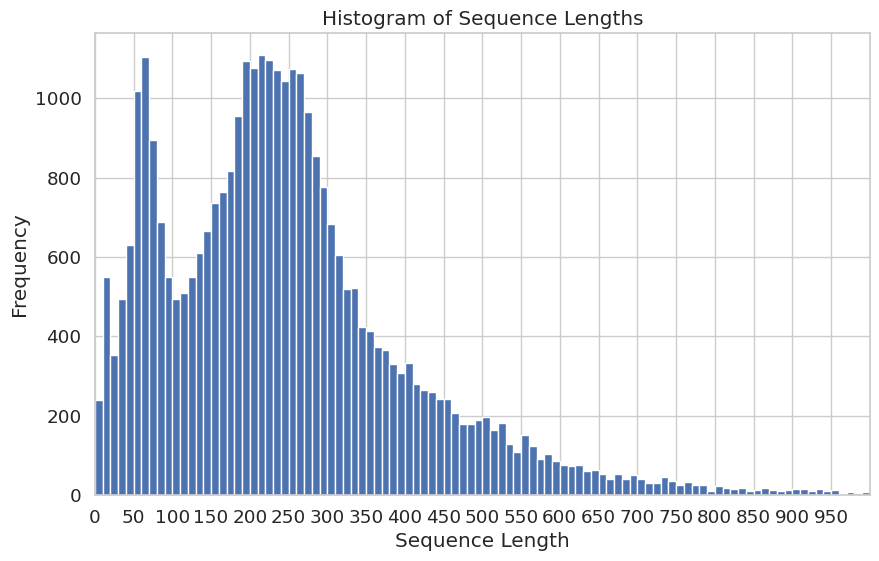

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)

# Count the number of unique tokens
num_unique_tokens = len(tokenizer.word_index)
print(f"Number of unique tokens: {num_unique_tokens}")


sequence_lengths = [len(seq) for seq in tokenized_train]

plt.figure(figsize=(10,6)) 
plt.hist(sequence_lengths, bins=100, range=(0,1000)) 
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sequence Lengths')

plt.xlim(0, 1000)

# Customize x-axis for more detail
start, end = plt.xlim()
plt.xticks(np.arange(start, end, step=50))

plt.show()


# Based on the histogram, I choosed a maxlen value that covers most of the samples.


In [ ]:
maxlen = 200

Selecting max_features is a bit more nuanced. In general, the max_features parameter in the tokenizer refers to the maximum number of words to keep, based on the frequency of words. Only the most common max_features words will be kept.

In [ ]:
num_unique_tokens = len(tokenizer.word_index)
print(f"Number of unique tokens: {num_unique_tokens}")


Number of unique tokens: 125718


 set max_features equal to num_unique_tokens, it means you're using all the words in your corpus to train your model.
 However, not all words are equally important. Some words might appear only a few times, and they might not contribute much to understanding the general sentiment of a text 
 
 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your model architecture (This should be your model)
def create_model():
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define a list of max_features to try
max_features_options = [5000, 10000, 15000, 20000]

# Loop over max_features_options
for max_features in max_features_options:
    # Tokenization and sequence padding
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(x_train)
    tokenized_train = tokenizer.texts_to_sequences(x_train)
    X_train = pad_sequences(tokenized_train, maxlen=maxlen)
    tokenized_test = tokenizer.texts_to_sequences(x_test)
    X_test = pad_sequences(tokenized_test, maxlen=maxlen)

    # Model creation
    model = create_model()

    # Model training
    model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

    # Model evaluation
    score, acc = model.evaluate(X_test, y_test, batch_size=32)
    print(f'Test score for max_features={max_features}: {score}')
    print(f'Test accuracy for max_features={max_features}: {acc}')


In [ ]:
max_features = 15000

# Tokenizing

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

# Tokenize and pad the training data
x_train_tokenized = tokenizer.texts_to_sequences(x_train)
x_train_padded = sequence.pad_sequences(x_train_tokenized, maxlen=maxlen)

# Tokenize and pad the test data
x_test_tokenized = tokenizer.texts_to_sequences(x_test)
x_test_padded = sequence.pad_sequences(x_test_tokenized, maxlen=maxlen)

# Glove
GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations of words. It is a popular word embedding technique that captures semantic relationships between words by training on large-scale textual data. The GloVe algorithm combines the advantages of global matrix factorization and local context window methods to create word embeddings that represent the meaning and relationships of words in a vector space.

The key idea behind GloVe is to create a word-word co-occurrence matrix based on the statistics of word co-occurrences within a given corpus. The matrix represents the frequency of word pairs occurring together in a specific context window. GloVe then factorizes this co-occurrence matrix to obtain word embeddings that capture the statistical relationships between words.

During training, the GloVe algorithm iteratively updates the word vectors to minimize a loss function that measures the discrepancy between the dot products of word vectors and the logarithm of their co-occurrence probabilities. This optimization process results in word vectors that encode both global semantic information and local contextual information.

The trained GloVe word vectors can be used in various natural language processing tasks, such as text classification, sentiment analysis, machine translation, and information retrieval. By leveraging the semantic relationships captured in the vector space, GloVe embeddings can help improve the performance of these tasks by enabling models to understand and generalize word meanings based on their contextual usage.

GloVe embeddings are typically pre-trained on large text corpora, such as Wikipedia or Common Crawl, and are available in different dimensions (e.g., 50, 100, 200, 300). Researchers and practitioners can use pre-trained GloVe embeddings or fine-tune them on their specific tasks to leverage the semantic knowledge encoded in these word vectors.

The choice of which GloVe embedding file to use depends on the specific requirements of your task and the trade-off between embedding dimensionality and computational resources. Here's an overview of the different GloVe embedding files you have:

glove.twitter.27B.25d.txt: This file contains GloVe embeddings with a dimensionality of 25. Embeddings with lower dimensions are computationally less expensive and have fewer parameters, but they may capture less semantic information and may not perform as well on tasks that require fine-grained representation.

glove.twitter.27B.50d.txt: This file contains GloVe embeddings with a dimensionality of 50. This dimensionality strikes a balance between capturing more semantic information than lower dimensions while still being relatively lightweight compared to higher dimensions.

glove.twitter.27B.100d.txt: This file contains GloVe embeddings with a dimensionality of 100. Embeddings with 100 dimensions are commonly used and provide a good balance between capturing semantic information and computational efficiency.

glove.twitter.27B.200d.txt: This file contains GloVe embeddings with a dimensionality of 200. Higher-dimensional embeddings have the potential to capture more fine-grained semantic information but come at the cost of increased computational requirements.

I am choosing the 50d because strikes a balance between capturing more semantic information than lower dimensions while still being relatively lightweight compared to higher dimensions.

In [ ]:
glove_emb_file = '/kaggle/input/glovetwitter27b50d/glove.twitter.27B.50d.txt'
#glove_emb_file = 'glove.twitter.27B.50d.txt'




The get_coefs function is updated to split each line based on spaces and extract the word and embedding vector separately.

The GloVe embeddings are loaded into the embeddings_index dictionary using a with statement to open the embedding file.

The all_embs array is created by converting the values of embeddings_index into a NumPy array.

The emb_mean and emb_std are computed using the mean and std methods on all_embs.

The embed_size is obtained from the shape of all_embs.

The embedding matrix embedding_matrix is initialized using np.random.normal with the calculated mean and standard deviation.

The code iterates over the word_index to populate the embedding matrix with the GloVe embeddings.

The emb_mean and emb_std are computed using the mean and standard deviation methods (mean and std) on the all_embs array, which contains all the embedding vectors from the pre-trained GloVe embeddings.

Calculating the mean and standard deviation of the embedding vectors allows us to understand the distribution of the embeddings in terms of their values and variations. These statistics provide insight into the typical range and spread of the embedding values, which can be useful for initializing the embedding matrix.

In [ ]:
# Function to extract word and embedding vector from a line in the embedding file
def get_coefs(line):
    parts = line.rstrip().split(' ')
    word = parts[0]
    vector = np.asarray(parts[1:], dtype='float32')
    return word, vector

# Load the GloVe embeddings into a dictionary
embeddings_index = {}
with open(glove_emb_file, 'r') as file:
    for line in file:
        word, vector = get_coefs(line)
        embeddings_index[word] = vector

# Compute mean and standard deviation of the embedding vectors
all_embs = np.array(list(embeddings_index.values()))
emb_mean, emb_std = all_embs.mean(), all_embs.std()

# Get the embedding size
embed_size = all_embs.shape[1]

# Create the embedding matrix
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

# Populate the embedding matrix with GloVe embeddings
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import ReduceLROnPlateau
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import classification_report, confusion_matrix
from keras_tuner import RandomSearch

import seaborn as sns
import matplotlib.pyplot as plt

#  Model

In [ ]:

def build_model(hp):
    model = Sequential()
    model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix],
                        input_length=maxlen, trainable=False))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                   return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                   recurrent_dropout=0.1, dropout=0.1))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
hyperparameters = HyperParameters()
hyperparameters.Choice('lstm_units', [32, 64, 128])

# Perform random search for hyperparameter tuning
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, hyperparameters=hyperparameters)
tuner.search(x_train_padded, y_train, validation_data=(x_test_padded, y_test), epochs=10, batch_size=256)


Trial 3 Complete [00h 42m 28s]
val_accuracy: 0.9914973378181458

Best val_accuracy So Far: 0.9914973378181458
Total elapsed time: 01h 08m 04s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

best_model.fit(x_train_padded, y_train, validation_data=(x_test_padded, y_test), epochs=10, batch_size=256)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 200, 128)          91648     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 727,393
Trainable params: 227,393
Non-trainable params: 500,000
_________________________________________________________________
Epoch 1/10
131/131 [========================

# Results

In [ ]:
loss, accuracy = best_model.evaluate(x_test_padded, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

350/350 [==============================] - 25s 71ms/step - loss: 0.0196 - accuracy: 0.9947
Test loss: 0.01962781697511673
Test accuracy: 0.994719386100769


In [ ]:
epochs = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(epochs, best_model.history.history['accuracy'], 'go-', label='Training Accuracy')
ax[0].plot(epochs, best_model.history.history['val_accuracy'], 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, best_model.history.history['loss'], 'go-', label='Training Loss')
ax[1].plot(epochs, best_model.history.history['val_loss'], 'ro-', label='Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
pred = best_model.predict_classes(x_test_padded)
pred[:5]


In [ ]:
print(classification_report(y_test, pred, target_names=['Fake', 'True']))


In [ ]:
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm, index=['Fake', 'True'], columns=['Fake', 'True'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()